# ETT (Electricity Transformer Temperature) Dataset - ETTh2

## Overview

The Electricity Transformer Temperature (ETT) dataset is designed for time series forecasting tasks, specifically focusing on the prediction of electricity transformer temperatures. This dataset is widely used in the research and development of forecasting models, particularly for applications in energy management and smart grid systems.

## ETTh2 Subset

The `ETTh2` subset of the ETT dataset contains hourly data collected from the first transformer. This subset is particularly useful for studying the temperature variations and trends on an hourly basis, enabling the development of models that can predict short-term temperature changes.

## Features

The dataset consists of several features, each representing a different aspect of the transformer's operational parameters and environmental conditions. The main features are:

- **date**: The timestamp of the recorded data.
- **HUFL**: High Useful Load Forecast, representing the forecasted load at a high level.
- **HULL**: High Useful Load Low, representing the forecasted load at a low level.
- **MUFL**: Medium Useful Load Forecast, representing the forecasted load at a medium level.
- **MULL**: Medium Useful Load Low, representing the forecasted load at a low level.
- **LUFL**: Low Useful Load Forecast, representing the forecasted load at a low level.
- **LULL**: Low Useful Load Low, representing the forecasted load at a low level.
- **OT**: Oil Temperature, representing the temperature of the transformer's oil, which is the target variable for forecasting.

> Forecast length : 96

## Data Format

The dataset is stored in a CSV file format with each row corresponding to a single hour of data. The columns in the file represent the different features described above. Here is a sample of the data format:

| date                | HUFL | HULL | MUFL | MULL | LUFL | LULL | OT   |
|---------------------|------|------|------|------|------|------|------|
| 2016-07-01 00:00:00 | 21.0 | 20.5 | 19.8 | 19.3 | 18.7 | 18.2 | 29.0 |
| 2016-07-01 01:00:00 | 20.8 | 20.3 | 19.6 | 19.1 | 18.5 | 18.0 | 28.8 |
| ...                 | ...  | ...  | ...  | ...  | ...  | ...  | ...  |

## Usage

The `ETTh2` subset is ideal for developing and testing time series forecasting models. Researchers and practitioners can use this dataset to:

- Develop predictive models for transformer temperature forecasting.
- Study the impact of load variations on transformer temperature.
- Test the performance of different time series forecasting algorithms.

## References

For more details on the dataset, you can refer to the official documentation and publications related to the ETT dataset. The dataset is publicly available and can be accessed from the following sources:

- [Official Repository](https://github.com/zhouhaoyi/ETDataset)
- [Research Paper](https://arxiv.org/abs/2012.07436)


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
%pip install gluonts

Note: you may need to restart the kernel to use updated packages.


In [3]:
from gluonts.dataset.repository import get_dataset, dataset_names

e:\ReadyTensor\rt-datasets-forecasting\.venv\Lib\site-packages\gluonts\json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [4]:
print(f"Available datasets: {dataset_names}")

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki2000_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5', 'uber_tlc_daily', 'uber_tlc_hourly', 'airpassengers', 'australian_electricity_demand', 'electricity_hourly', 'electricity_weekly', 'rideshare_wit

In [5]:
gluonts_dataset_name = "ett_small_1h"

In [6]:
dataset_name = "etth2_forecast_len_96"

In [7]:
dataset_path = Path(f'./../../raw/{dataset_name}/')
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [8]:
data = get_dataset(gluonts_dataset_name, regenerate=True,path=dataset_path)

In [9]:
data.metadata.json()

'{"freq": "1h", "target": null, "feat_static_cat": [], "feat_static_real": [], "feat_dynamic_real": [], "feat_dynamic_cat": [], "prediction_length": 24}'

In [10]:
df_gluonts = pd.DataFrame(data.train)
print("data shape : ",df_gluonts.shape)
print(df_gluonts.iloc[0]['target'].shape)
print(df_gluonts['item_id'].unique())
df_gluonts.head()

data shape :  (14, 3)
(17396,)
['HUFL_0' 'HULL_0' 'MUFL_0' 'MULL_0' 'LUFL_0' 'LULL_0' 'OT_0' 'HUFL_1'
 'HULL_1' 'MUFL_1' 'MULL_1' 'LUFL_1' 'LULL_1' 'OT_1']


,start,item_id,target
0,2016-07-01 00:00,HUFL_0,"[5.827, 5.693, 5.157, 5.09, 5.358, 5.626, 7.16..."
1,2016-07-01 00:00,HULL_0,"[2.009, 2.076, 1.741, 1.942, 1.942, 2.143, 2.9..."
2,2016-07-01 00:00,MUFL_0,"[1.599, 1.492, 1.279, 1.279, 1.492, 1.528, 2.1..."
3,2016-07-01 00:00,MULL_0,"[0.462, 0.426, 0.355, 0.391, 0.462, 0.533, 0.7..."
4,2016-07-01 00:00,LUFL_0,"[4.203, 4.142, 3.777, 3.807, 3.868, 4.051, 5.0..."


In [11]:
df_test = pd.DataFrame(data.test)
print("data shape : ",df_test.shape)
print(df_test.iloc[0]['target'].shape)
print(df_test['item_id'].unique())
print("Are both datasets the same ?? ",df_gluonts.equals(df_test))
df_test.head()


data shape :  (14, 3)
(17420,)
['HUFL_0' 'HULL_0' 'MUFL_0' 'MULL_0' 'LUFL_0' 'LULL_0' 'OT_0' 'HUFL_1'
 'HULL_1' 'MUFL_1' 'MULL_1' 'LUFL_1' 'LULL_1' 'OT_1']
Are both datasets the same ??  True


,start,item_id,target
0,2016-07-01 00:00,HUFL_0,"[5.827, 5.693, 5.157, 5.09, 5.358, 5.626, 7.16..."
1,2016-07-01 00:00,HULL_0,"[2.009, 2.076, 1.741, 1.942, 1.942, 2.143, 2.9..."
2,2016-07-01 00:00,MUFL_0,"[1.599, 1.492, 1.279, 1.279, 1.492, 1.528, 2.1..."
3,2016-07-01 00:00,MULL_0,"[0.462, 0.426, 0.355, 0.391, 0.462, 0.533, 0.7..."
4,2016-07-01 00:00,LUFL_0,"[4.203, 4.142, 3.777, 3.807, 3.868, 4.051, 5.0..."


## Extracting first county data from the dataset

In [12]:
df_gluonts = df_gluonts.iloc[7:,:]
df_gluonts.shape

(7, 3)

In [13]:
for i in range(df_gluonts.shape[0]):
    print(df_gluonts.iloc[i]['target'].shape)
df_gluonts

(17396,)
(17396,)
(17396,)
(17396,)
(17396,)
(17396,)
(17396,)


,start,item_id,target
7,2016-07-01 00:00,HUFL_1,"[41.13, 37.528, 37.947, 38.952, 38.114, 36.774..."
8,2016-07-01 00:00,HULL_1,"[12.481, 10.136, 11.309, 11.895, 11.476, 10.97..."
9,2016-07-01 00:00,MUFL_1,"[36.536, 33.936, 35.33, 35.544, 35.41, 34.928,..."
10,2016-07-01 00:00,MULL_1,"[9.355, 7.532, 9.007, 9.436, 9.623, 9.248, 10...."
11,2016-07-01 00:00,LUFL_1,"[4.424, 4.435, 2.1, 3.38, 2.036, 2.036, 2.036,..."
12,2016-07-01 00:00,LULL_1,"[1.311, 1.215, 0.0, 1.215, 0.0, 0.0, 0.0, 0.0,..."
13,2016-07-01 00:00,OT_1,"[38.662, 37.124, 36.465, 33.6085, 31.8505, 30...."


## Spreading each variable across the dataframe

In [14]:
from datetime import timedelta

ext = '_1'
df_gluonts_pivot = df_gluonts.pivot(index='start', columns='item_id', values='target',).reset_index().rename_axis(None, axis=1)

timestamp = df_gluonts_pivot.loc[0, 'start']
series_id = 'series' + ext

length_of_lists = len(df_gluonts_pivot.loc[0, 'HUFL'+ext])

timeseries_df = {
    'series_id': [series_id] * length_of_lists,
    'timestamp': [timestamp + timedelta(hours=i) for i in range(length_of_lists)],
    'HUFL': df_gluonts_pivot.loc[0, 'HUFL'+ext],
    'HULL': df_gluonts_pivot.loc[0, 'HULL'+ext],
    'LUFL': df_gluonts_pivot.loc[0, 'LUFL'+ext],
    'LULL': df_gluonts_pivot.loc[0, 'LULL'+ext],
    'MUFL': df_gluonts_pivot.loc[0, 'MUFL'+ext],
    'MULL': df_gluonts_pivot.loc[0, 'MULL'+ext],
    'OT': df_gluonts_pivot.loc[0, 'OT'+ext],
}

timeseries_df = pd.DataFrame(timeseries_df)

timeseries_df

,series_id,timestamp,HUFL,HULL,LUFL,LULL,MUFL,MULL,OT
0,series_1,2016-07-01 00:00,41.130001,12.481000,4.424,1.311,36.535999,9.355,38.661999
1,series_1,2016-07-01 01:00,37.528000,10.136000,4.435,1.215,33.936001,7.532,37.124001
2,series_1,2016-07-01 02:00,37.946999,11.309000,2.100,0.000,35.330002,9.007,36.465000
3,series_1,2016-07-01 03:00,38.952000,11.895000,3.380,1.215,35.543999,9.436,33.608501
4,series_1,2016-07-01 04:00,38.113998,11.476000,2.036,0.000,35.410000,9.623,31.850500
...,...,...,...,...,...,...,...,...,...
17391,series_1,2018-06-25 15:00,36.104000,17.004999,-9.542,-2.463,45.917999,11.661,50.625000
17392,series_1,2018-06-25 16:00,40.041000,10.471000,-10.757,-1.844,51.252998,11.366,49.745998
17393,series_1,2018-06-25 17:00,39.622002,10.722000,-10.757,-1.844,50.931000,11.124,48.867001
17394,series_1,2018-06-25 18:00,39.202999,9.801000,-9.499,-1.290,49.055000,10.079,47.988499


# Identify columns to use for the dataset

In [15]:
series_col = "series_id"
epoch_col = ''
time_col = 'timestamp'
value_col = 'OT'
exog_cols=['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL' ]

# Visualize

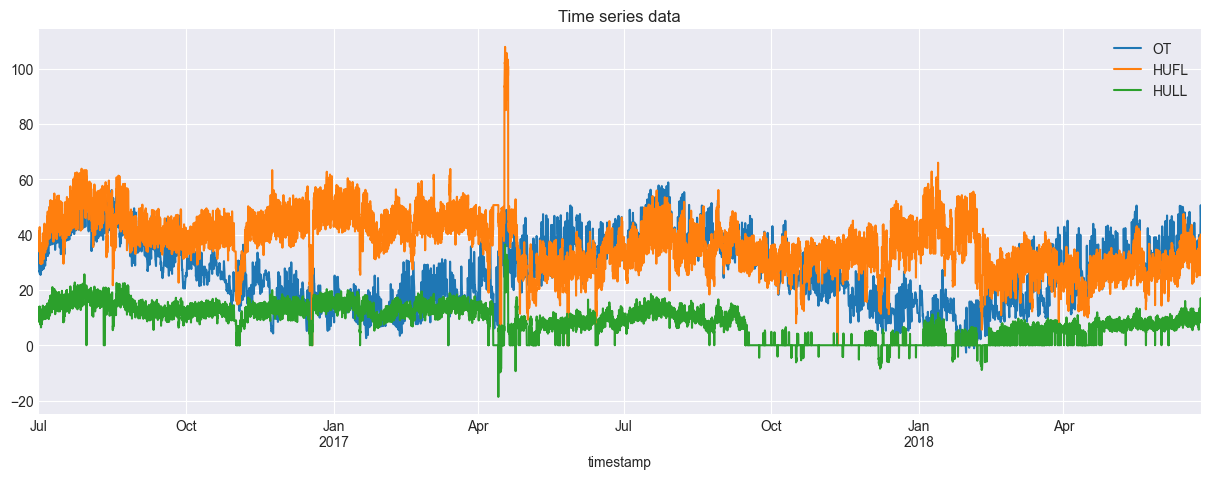

In [16]:
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(15, 5))
timeseries_df.plot(x=time_col, y=value_col, ax=ax)
for exog_col in exog_cols[:2]:
    ax.plot(timeseries_df[time_col], timeseries_df[exog_col], label=exog_col)
plt.title(f"Time series data")
plt.grid(True)
plt.legend()
plt.show()


# Save Data

In [17]:
timeseries_df.sort_values(by=[series_col, time_col], inplace=True)
timeseries_df.to_csv(outp_fname, index=False)

In [18]:
timeseries_df.shape

(17396, 9)